# 1. Splice Classification

Splice junctions are points on a DNA sequence at which ‘superfluous’ DNA is removed
during the process of protein creation in higher organisms. The problem we aim to solve is
to recognize, given a sequence of DNA, the boundaries between exons (the parts of the DNA
sequence retained after splicing) and introns (the parts of the DNA sequence that are spliced
out). For more details see UCI
and DELVE site.

1. Load the dataset splice.

In [3]:
from sklearn.datasets import load_svmlight_file
import numpy as np

X, Y = load_svmlight_file("./splice")
X.shape, np.unique(Y)

((1000, 60), array([-1.,  1.]))

The data has 60000 samples and 2 features

3. Build two large logarithmic grids of size 25 for the kernel parameter γ in the range 10 −3 to
1 and for C in the interval 10 −1/2 to 10 2

In [2]:
gamma_grid = np.logspace(-3, 0, 25) 
C_grid = np.logspace(-0.5,2,25)

gamma_grid,C_grid

(array([0.001     , 0.00133352, 0.00177828, 0.00237137, 0.00316228,
        0.00421697, 0.00562341, 0.00749894, 0.01      , 0.01333521,
        0.01778279, 0.02371374, 0.03162278, 0.04216965, 0.05623413,
        0.07498942, 0.1       , 0.13335214, 0.17782794, 0.23713737,
        0.31622777, 0.4216965 , 0.56234133, 0.74989421, 1.        ]),
 array([  0.31622777,   0.40194503,   0.51089698,   0.64938163,
          0.82540419,   1.04913973,   1.33352143,   1.69498815,
          2.15443469,   2.73841963,   3.48070059,   4.42418555,
          5.62341325,   7.14770577,   9.08517576,  11.54781985,
         14.67799268,  18.65663579,  23.71373706,  30.1416253 ,
         38.3118685 ,  48.69675252,  61.89658189,  78.67438077,
        100.        ]))

4. To select the best model we will perform a grid search over the previously defined grids
using GridSearchCV function of Scikit-Learn. First let set up the classifier and the grid
search module. The best model will be selected based on the accuracy performance and
K-fold validation (feel free to adapt the value of K).


After that the best model is learned

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# the grid
parameters = [{"gamma": gamma_grid, "C": C_grid}]

# the classifier
clf_rbf = SVC(kernel="rbf", tol=0.01)

# Perf a K-fold validation using the accuracy as the performance measure
K = 3
# we will dot it on a grid search using n_jobs processors
clf_rbf = GridSearchCV(clf_rbf, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)

clf_rbf.fit(X,Y)

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


GridSearchCV(cv=3, estimator=SVC(tol=0.01), n_jobs=2,
             param_grid=[{'C': array([  0.31622777,   0.40194503,   0.51089698,   0.64938163,
         0.82540419,   1.04913973,   1.33352143,   1.69498815,
         2.15443469,   2.73841963,   3.48070059,   4.42418555,
         5.62341325,   7.14770577,   9.08517576,  11.54781985,
        14.67799268,  18.65663579,  23.71373706,  30.1416253 ,
        38.3118685 ,  48.69675252,  61.89658189,  78.67438077,
       100.        ]),
                          'gamma': array([0.001     , 0.00133352, 0.00177828, 0.00237137, 0.00316228,
       0.00421697, 0.00562341, 0.00749894, 0.01      , 0.01333521,
       0.01778279, 0.02371374, 0.03162278, 0.04216965, 0.05623413,
       0.07498942, 0.1       , 0.13335214, 0.17782794, 0.23713737,
       0.31622777, 0.4216965 , 0.56234133, 0.74989421, 1.        ])}],
             scoring='accuracy', verbose=1)

5. Let check the best selected hyper-parameters, the corresponding accuracy and the validation
performance graphic along the grid. Is the figure in accordance with the chosen hyper-
parameters ?


 Rbf kernel - optimal hyper-parameters = {'C': 4.424185553847919, 'gamma': 0.01333521432163324}

 Rbf kernel - best cross-val accuracy = 0.8740327153500806


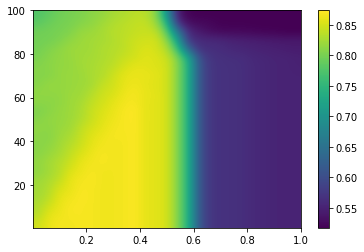

In [4]:
# Get the best parameters
print("\n Rbf kernel - optimal hyper-parameters = {}".format(clf_rbf.best_params_))
print("\n Rbf kernel - best cross-val accuracy = {}".format(clf_rbf.best_score_))


## Plot the validation performance w.r.t. C and gamma
import matplotlib.pyplot as plt
plt.imshow(clf_rbf.cv_results_["mean_test_score"].reshape(gamma_grid.shape[0],C_grid.shape[0]), extent=[min(gamma_grid),max(gamma_grid),min(C_grid),max(C_grid)],interpolation="bicubic",aspect="auto")
plt.colorbar()
plt.show()

6. At this stage, ask for the test set. Load it as in question 1. Compute the prediction accuracy
on the test set. Compute and plot the confusion matrix. Comment on the obtained results
Hint : refer to the documentation of confusion matrix for more details.

In [6]:

index_C = C_grid.tolist().index(clf_rbf.best_params_["C"])
index_gamma = gamma_grid.tolist().index(clf_rbf.best_params_["gamma"])

gamma_grid_optim = np.linspace(gamma_grid[index_gamma-2],gamma_grid[index_gamma+2],25)
c_grid_optim = np.linspace(C_grid[index_C-2],C_grid[index_C+2],25)

parameters_optim = {"gamma":gamma_grid_optim, "C": c_grid_optim}

clf_rbf_optim = SVC(kernel="rbf", tol=0.01)
clf_rbf_optim = GridSearchCV(clf_rbf_optim, param_grid=parameters_optim, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)

clf_rbf_optim.fit(X,Y)

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


GridSearchCV(cv=3, estimator=SVC(tol=0.01), n_jobs=2,
             param_grid={'C': array([2.73841963, 2.92213989, 3.10586015, 3.2895804 , 3.47330066,
       3.65702091, 3.84074117, 4.02446142, 4.20818168, 4.39190193,
       4.57562219, 4.75934245, 4.9430627 , 5.12678296, 5.31050321,
       5.49422347, 5.67794372, 5.86166398, 6.04538423, 6.22910449,
       6.41282475, 6.596545  , 6.78026526, 6.96398551, 7.14770577]),
                         'gamma': array([0.00749894, 0.00817456, 0.00885018, 0.00952579, 0.01020141,
       0.01087702, 0.01155264, 0.01222826, 0.01290387, 0.01357949,
       0.01425511, 0.01493072, 0.01560634, 0.01628196, 0.01695757,
       0.01763319, 0.01830881, 0.01898442, 0.01966004, 0.02033565,
       0.02101127, 0.02168689, 0.0223625 , 0.02303812, 0.02371374])},
             scoring='accuracy', verbose=1)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

Xtest, Ytest = load_svmlight_file("./splice.t")
Xtest.shape,Ytest.shape

((2175, 60), (2175,))

In [ ]:
clf_rbf_bien.gamma = 

0.9016091954022989

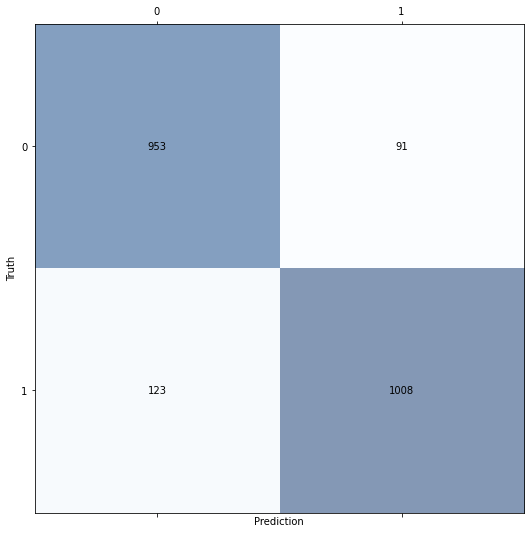

In [12]:
Ytest_pred = clf_rbf_optim.predict(Xtest)

confmat = confusion_matrix(Ytest, Ytest_pred)
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
        plt.xlabel("Prediction"); plt.ylabel("Truth");
        
acc_test = accuracy_score(Ytest, Ytest_pred)
acc_test

7. Inspiring from the previous questions, learn a linear SVM. It’s hyper-parameter must be
selected using the grid search tool. Compare the obtained results to the non-linear SVM
case.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gamma_grid = np.logspace(-3,1,25)
C_grid = np.logspace(-1/2, 2, 25)

parameters = [{"C": C_grid}]

clf_linear = SVC(kernel="linear", tol=0.01)

K=3

clf_linear = GridSearchCV(clf_linear, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs=2)

In [6]:
clf_linear.fit(X,Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(kernel='linear', tol=0.01), n_jobs=2,
             param_grid=[{'C': array([  0.31622777,   0.40194503,   0.51089698,   0.64938163,
         0.82540419,   1.04913973,   1.33352143,   1.69498815,
         2.15443469,   2.73841963,   3.48070059,   4.42418555,
         5.62341325,   7.14770577,   9.08517576,  11.54781985,
        14.67799268,  18.65663579,  23.71373706,  30.1416253 ,
        38.3118685 ,  48.69675252,  61.89658189,  78.67438077,
       100.        ])}],
             scoring='accuracy', verbose=1)

In [7]:
# Get the best parameters
print("\n Linear kernel - optimal hyper-parameters = {}".format(clf_linear.best_params_))
print("\n Linear kernel - best cross-val accuracy = {}".format(clf_linear.best_score_))


 Linear kernel - optimal hyper-parameters = {'C': 0.4019450333615125}

 Linear kernel - best cross-val accuracy = 0.7840355325385265


In [8]:
# define a linear SVM with C = 1
C = clf_linear.best_params_['C']
clf_svm = SVC(kernel="linear", C = C) # we seek a linear svm (kernel ="linear")
# fit the parameters of the model
clf_svm.fit(X, Y)

SVC(C=0.4019450333615125, kernel='linear')

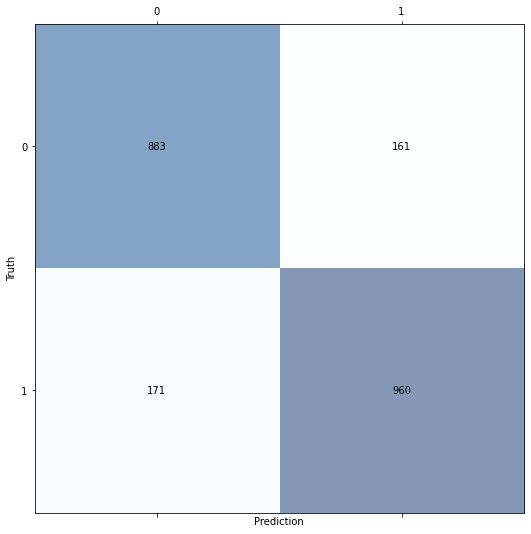

In [13]:
import matplotlib.pyplot as plt


Ytest_pred2 = clf_svm.predict(Xtest)
confmat2 = confusion_matrix(Ytest, Ytest_pred2 )
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.5)
for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax.text(x=j, y=i, s=confmat2[i, j], va="center", ha="center")

plt.xlabel("Prediction"); plt.ylabel("Truth");

In [14]:
accuracy2 = (confmat2[0,0] + confmat2[1,1])/2175
accuracy2

0.8473563218390805